In [3]:
import numpy as np
import cv2


def color_op():
    src = cv2.imread('../data/img/coins.png', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    print('src.shape:', src.shape)
    print('src.dtype:', src.dtype)

    # b, g, r = src[0, 0]
    print('The pixel value [B, G, R] at (0, 0) is', src[0, 0])


def color_inverse():
    src = cv2.imread('../data/img/coins.png', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    dst = np.zeros(src.shape, src.dtype)

    for j in range(src.shape[0]):
        for i in range(src.shape[1]):
            p1 = src[j, i]
            p2 = dst[j, i]

            p2[0] = 255 - p1[0]
            p2[1] = 255 - p1[1]
            p2[2] = 255 - p1[2]

    cv2.imshow('src', src)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    cv2.destroyAllWindows()


def color_grayscale():
    src = cv2.imread('../data/img/coins.png', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    cv2.imshow('src', src)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    cv2.destroyAllWindows()


def color_split():
    src = cv2.imread('../data/img/coins.png', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    # b_plane, g_plane, r_plane = cv2.split(src)
    bgr_planes = cv2.split(src)

    cv2.imshow('src', src)
    cv2.imshow('B_plane', bgr_planes[0])
    cv2.imshow('G_plane', bgr_planes[1])
    cv2.imshow('R_plane', bgr_planes[2])
    cv2.waitKey()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    color_op()
    color_inverse()
    color_grayscale()
    color_split()


src.shape: (923, 922, 3)
src.dtype: uint8
The pixel value [B, G, R] at (0, 0) is [214 231 237]


In [5]:
import numpy as np
import cv2


def on_hue_changed(_=None):
    lower_hue = cv2.getTrackbarPos('Lower Hue', 'mask')
    upper_hue = cv2.getTrackbarPos('Upper Hue', 'mask')

    lowerb = (lower_hue, 100, 0)
    upperb = (upper_hue, 255, 255)
    mask = cv2.inRange(src_hsv, lowerb, upperb)

    cv2.imshow('mask', mask)


def main():
    global src_hsv

    src = cv2.imread('../data/img/coins.png', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

    cv2.imshow('src', src)

    cv2.namedWindow('mask')
    cv2.createTrackbar('Lower Hue', 'mask', 40, 179, on_hue_changed)
    cv2.createTrackbar('Upper Hue', 'mask', 80, 179, on_hue_changed)
    on_hue_changed(0)

    cv2.waitKey()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    main()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [3]:
import numpy as np
import cv2


# Calculate CrCb histogram from a reference image

ref = cv2.imread('../data/img/ref.png', cv2.IMREAD_COLOR)
mask = cv2.imread('../data/img/mask.bmp', cv2.IMREAD_GRAYSCALE)
ref_ycrcb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)

channels = [1, 2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

hist = cv2.calcHist([ref_ycrcb], channels, mask, histSize, ranges)

# Apply histogram backprojection to an input image

src = cv2.imread('../data/img/kids.png', cv2.IMREAD_COLOR)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

cv2.imshow('src', src)
cv2.imshow('backproj', backproj)
cv2.waitKey()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [4]:
import numpy as np
import cv2


# Calculate CrCb histogram from a reference image

ref = cv2.imread('../data/img/mille_girl.png', cv2.IMREAD_COLOR)
mask = cv2.imread('../data/img/mille_girl.bmp', cv2.IMREAD_GRAYSCALE)
ref_ycrcb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)

channels = [1, 2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

hist = cv2.calcHist([ref_ycrcb], channels, mask, histSize, ranges)

# Apply histogram backprojection to an input image

src = cv2.imread('../data/img/mille_girl.png', cv2.IMREAD_COLOR)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

cv2.imshow('src', src)
cv2.imshow('backproj', backproj)
cv2.waitKey()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


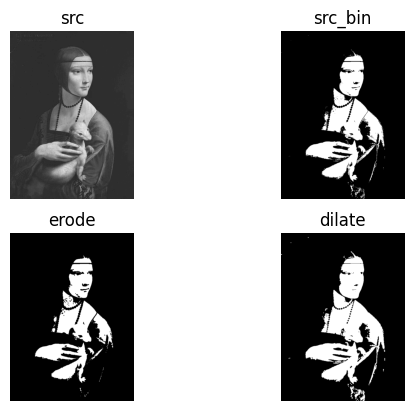

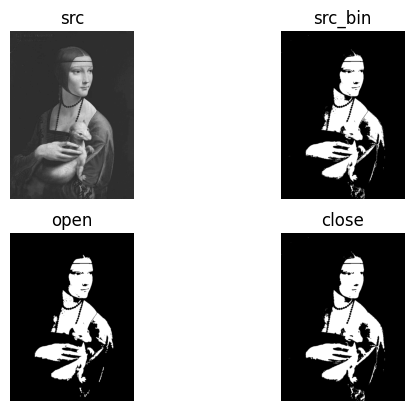

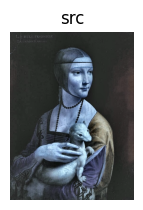

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
def exec_clahe():
    #--①이미지 읽어서 YUV 컬러스페이스로 변경
    img = cv2.imread('../data/img/eee.png')
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    #--② 밝기 채널에 대해서 이퀄라이즈 적용
    img_eq = img_yuv.copy()
    img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
    img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

    #--③ 밝기 채널에 대해서 CLAHE 적용
    img_clahe = img_yuv.copy()
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
    img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
    img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

    plt.subplot(221), plt.axis('off'), plt.imshow(img_clahe, 'gray'), plt.title('src')
    plt.show()

def erode_dilate():
    src = cv2.imread('../data/img/eee.png', cv2.IMREAD_GRAYSCALE)

    if src is None:
        print('Image load failed!')
        return 

    _, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    dst1 = cv2.erode(src_bin, None)
    dst2 = cv2.dilate(src_bin, None)

    plt.subplot(221), plt.axis('off'), plt.imshow(src, 'gray'), plt.title('src')
    plt.subplot(222), plt.axis('off'), plt.imshow(src_bin, 'gray'), plt.title('src_bin')
    plt.subplot(223), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('erode')
    plt.subplot(224), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('dilate')
    plt.show()


def open_close():
    src = cv2.imread('../data/img/eee.png', cv2.IMREAD_GRAYSCALE)

    if src is None:
        print('Image load failed!')
        return

    _, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, None)
    dst2 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, None)

    plt.subplot(221), plt.axis('off'), plt.imshow(src, 'gray'), plt.title('src')
    plt.subplot(222), plt.axis('off'), plt.imshow(src_bin, 'gray'), plt.title('src_bin')
    plt.subplot(223), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('open')
    plt.subplot(224), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('close')
    plt.show()


if __name__ == '__main__':
    erode_dilate()
    open_close()
    exec_clahe()

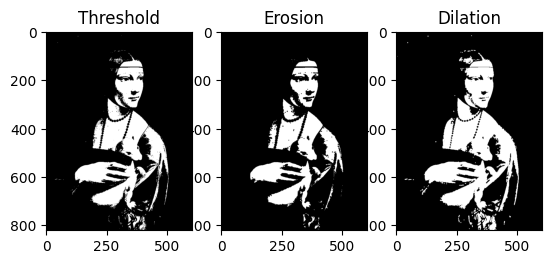

In [7]:
def exec_clahe():
    # img = cv2.imread('path_to_your_image.jpg')  # Make sure to use the correct path
    img = cv2.imread('../data/img/eee.png')
    if img is None:
        print('Image load failed!')
        return

    img_clahe = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)  # Convert to YUV color space

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_clahe[:, :, 0] = clahe.apply(img_clahe[:, :, 0])  # Apply CLAHE to the Y channel

    img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)  # Convert back to BGR color space

    # Convert to grayscale before applying thresholding
    gray_img = cv2.cvtColor(img_clahe, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, src_bin = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    dst1 = cv2.erode(src_bin, None)
    dst2 = cv2.dilate(src_bin, None)

    # Display results
    plt.subplot(131), plt.imshow(src_bin, cmap='gray'), plt.title('Threshold')
    plt.subplot(132), plt.imshow(dst1, cmap='gray'), plt.title('Erosion')
    plt.subplot(133), plt.imshow(dst2, cmap='gray'), plt.title('Dilation')
    plt.show()
    
exec_clahe()

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
def exec_clahe():
    #--①이미지 읽어서 YUV 컬러스페이스로 변경
    img = cv2.imread('../data/img/bbb.png')
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    #--② 밝기 채널에 대해서 이퀄라이즈 적용
    img_eq = img_yuv.copy()
    img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
    img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

    #--③ 밝기 채널에 대해서 CLAHE 적용
    img_clahe = img_yuv.copy()
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
    img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
    img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

    _, src_bin = cv2.threshold(img_clahe, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    dst1 = cv2.erode(src_bin, None)
    dst2 = cv2.dilate(src_bin, None)  
    
    plt.subplot(223), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('erode')
    plt.subplot(224), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('dilate')
    plt.show()  

if __name__ == '__main__': 
    exec_clahe()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1559: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)
